# SJByrnes using QuTip

This notebook has been inspired by the Qutip lecture notebook on the [Jaynes-Cumming-model](https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-1-Jaynes-Cumming-model.ipynb)  

(n.b. I think there might be an error in that lecture notebook as outlined [here](https://github.com/jrjohansson/qutip-lectures/issues/3))  and the work of [SJByrnes](https://coldfusionblog.net/2017/07/09/numerical-spin-boson-model-part-1/)



## Import the necessary libraries

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
from qutip import *
import plotly.express as px

## Specify parameters for the system

In [86]:
E = 1.0                # two level energy difference
N = 11                 # number of phonon quanta needed to exite the atom
E_phonon = E / N       # phonon energy
M = 101                # maximum number of phonons to simulate
ng = 100               # number of different coupling strengths to try out (need 100 to reproduce SJByrnes Moiré pattern)
max_coupling = 0.2*E   # maximum atom phonon coupling 

## Set up a dataframe to hold the data we will calculate later

In [87]:
d = {"coupling":np.linspace(0,max_coupling,ng)}
for i in range(2*M):
    d[f"energy_{i}"] = np.zeros(ng)
    
df = pd.DataFrame(data=d)

## Create operators for the hamiltonian

When creating operators for a multi-particle system, you do something like 

```tensor(operator on particle 1, operator on particle 2)```

If you don't want the operator to do any mixing between the particles then you will need to use the identiy operator `qeye` in one of the places

In [88]:
a  = tensor(destroy(M), qeye(2)) # phonon destruction operator
sm = tensor(qeye(M), sigmam())   # sigma_minus operator which is often called a lowering operator
sz = tensor(qeye(M),sigmaz())    # z component of the "spin" of the two level system

## Create the Hamiltonian and find eigenvalues for each coupling strength


In [89]:
for index, row in df.iterrows():
    # c.f. https://coldfusionblog.net/2017/07/09/numerical-spin-boson-model-part-1/
    H = E*sz/2 + E_phonon*(a.dag()*a+0.5) + row.coupling*(a.dag() + a) * (sm + sm.dag())
    evals, ekets = H.eigenstates()
    df.iloc[index,1:] = evals/E_phonon
    
print("\nSample row from the dataframe\n")
df.sample(1)


Sample row from the dataframe



,coupling,energy_0,energy_1,energy_2,energy_3,energy_4,energy_5,energy_6,energy_7,energy_8,...,energy_192,energy_193,energy_194,energy_195,energy_196,energy_197,energy_198,energy_199,energy_200,energy_201
78,0.157576,-5.358922,-5.001768,-4.496466,-3.9434,-3.349497,-2.726536,-2.080263,-1.414936,-0.733539,...,114.877459,114.916637,117.969514,117.991408,121.397934,121.410762,125.332162,125.339892,130.212492,130.21711


## Reshape dataframe to make plotting a bit easier

In [90]:
melt = df.melt(id_vars=["coupling"],var_name="level",value_name="energy")
melt.sample(3)

,coupling,level,energy
5550,0.101010,energy_55,26.673088
12673,0.147475,energy_126,60.511174
18152,0.105051,energy_181,95.012096


## Plot the energy levels

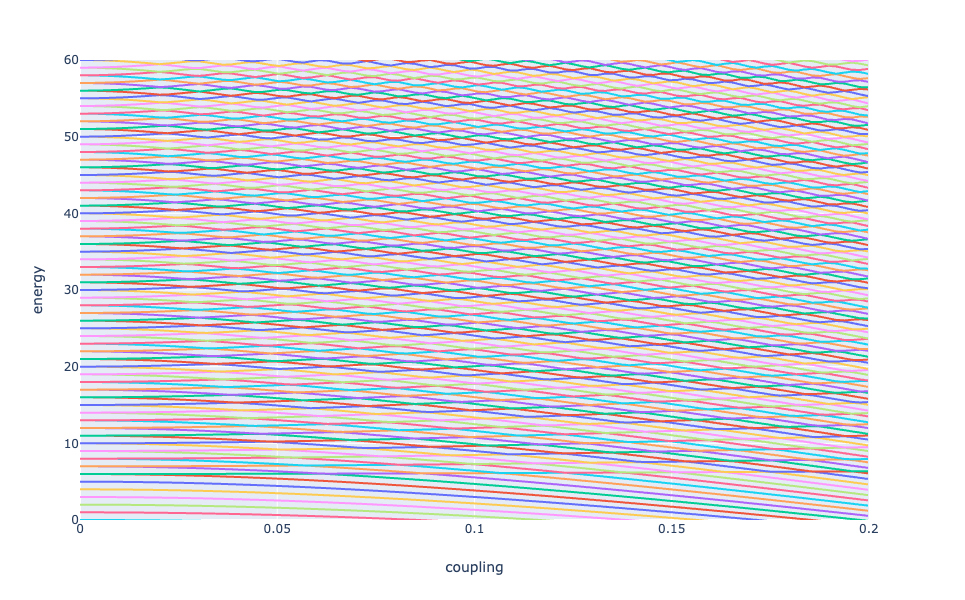

In [91]:
fig = px.line(melt,x="coupling",y="energy",color="level",range_y=[0,60],width=900,height=600)
fig.layout.showlegend = False 
fig.show()  # Don't use plot when you have M ~ 1000 it will likely grind to a hault
# fig.write_image("levels.png")

We see above the SJByrnes Moiré pattern - great!

## SJByrnes numerical comparison

Running SJByrnes code with `sectors = "both"` gives the following energies for zero coupling

In [105]:
SJB_both_sectors_zero_coupling = np.array([-0.45454545, -0.36363636, -0.27272727, -0.18181818, -0.09090909,
        0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
        0.45454545,  0.54545455,  0.54545455,  0.63636364,  0.63636364,
        0.72727273,  0.72727273,  0.81818182,  0.81818182,  0.90909091,
        0.90909091,  1.        ,  1.        ,  1.09090909,  1.09090909,
        1.18181818,  1.18181818,  1.27272727,  1.27272727,  1.36363636,
        1.36363636,  1.45454545,  1.45454545,  1.54545455,  1.54545455,
        1.63636364,  1.63636364,  1.72727273,  1.72727273,  1.81818182,
        1.81818182,  1.90909091,  1.90909091,  2.        ,  2.        ,
        2.09090909,  2.09090909,  2.18181818,  2.18181818,  2.27272727,
        2.27272727,  2.36363636,  2.36363636,  2.45454545,  2.45454545,
        2.54545455,  2.54545455,  2.63636364,  2.63636364,  2.72727273,
        2.72727273,  2.81818182,  2.81818182,  2.90909091,  2.90909091,
        3.        ,  3.        ,  3.09090909,  3.09090909,  3.18181818,
        3.18181818,  3.27272727,  3.27272727,  3.36363636,  3.36363636,
        3.45454545,  3.45454545,  3.54545455,  3.54545455,  3.63636364,
        3.63636364,  3.72727273,  3.72727273,  3.81818182,  3.81818182,
        3.90909091,  3.90909091,  4.        ,  4.        ,  4.09090909,
        4.09090909,  4.18181818,  4.18181818,  4.27272727,  4.27272727,
        4.36363636,  4.36363636,  4.45454545,  4.45454545,  4.54545455,
        4.54545455,  4.63636364,  4.63636364,  4.72727273,  4.72727273,
        4.81818182,  4.81818182,  4.90909091,  4.90909091,  5.        ,
        5.        ,  5.09090909,  5.09090909,  5.18181818,  5.18181818,
        5.27272727,  5.27272727,  5.36363636,  5.36363636,  5.45454545,
        5.45454545,  5.54545455,  5.54545455,  5.63636364,  5.63636364,
        5.72727273,  5.72727273,  5.81818182,  5.81818182,  5.90909091,
        5.90909091,  6.        ,  6.        ,  6.09090909,  6.09090909,
        6.18181818,  6.18181818,  6.27272727,  6.27272727,  6.36363636,
        6.36363636,  6.45454545,  6.45454545,  6.54545455,  6.54545455,
        6.63636364,  6.63636364,  6.72727273,  6.72727273,  6.81818182,
        6.81818182,  6.90909091,  6.90909091,  7.        ,  7.        ,
        7.09090909,  7.09090909,  7.18181818,  7.18181818,  7.27272727,
        7.27272727,  7.36363636,  7.36363636,  7.45454545,  7.45454545,
        7.54545455,  7.54545455,  7.63636364,  7.63636364,  7.72727273,
        7.72727273,  7.81818182,  7.81818182,  7.90909091,  7.90909091,
        8.        ,  8.        ,  8.09090909,  8.09090909,  8.18181818,
        8.18181818,  8.27272727,  8.27272727,  8.36363636,  8.36363636,
        8.45454545,  8.45454545,  8.54545455,  8.54545455,  8.63636364,
        8.63636364,  8.72727273,  8.81818182,  8.90909091,  9.        ,
        9.09090909,  9.18181818,  9.27272727,  9.36363636,  9.45454545,
        9.54545455,  9.63636364])

Let's compare to the qutip values by doing a simple difference

In [103]:
(SJB_both_sectors_zero_coupling - df.iloc[0].values[1:]*E_phonon)

array([ 4.54545457e-09,  3.63636365e-09,  2.72727269e-09,  1.81818183e-09,
        9.09090886e-10,  0.00000000e+00, -9.09090830e-10, -1.81818186e-09,
       -2.72727291e-09, -3.63636365e-09, -4.54545468e-09,  4.54545457e-09,
        4.54545457e-09,  3.63636377e-09,  3.63636365e-09,  2.72727296e-09,
        2.72727274e-09,  1.81818194e-09,  1.81818194e-09,  9.09090803e-10,
        9.09090581e-10,  0.00000000e+00,  0.00000000e+00, -9.09090803e-10,
       -9.09091025e-10, -1.81818138e-09, -1.81818183e-09, -2.72727285e-09,
       -2.72727307e-09, -3.63636365e-09, -3.63636388e-09, -4.54545468e-09,
       -4.54545468e-09,  4.54545468e-09,  4.54545468e-09,  3.63636388e-09,
        3.63636388e-09,  2.72727285e-09,  2.72727285e-09,  1.81818161e-09,
        1.81818161e-09,  9.09091247e-10,  9.09090581e-10,  0.00000000e+00,
        0.00000000e+00, -9.09091025e-10, -9.09091469e-10, -1.81818161e-09,
       -1.81818161e-09, -2.72727307e-09, -2.72727352e-09, -3.63636321e-09,
       -3.63636410e-09, -

The calculated energies are very close indeed.